# Importing Important Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # Using for Q-Q Plot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# Loading the Titanic Dataset

We need only three columns to do the work: `Age`, `Fare` and `Survived`.


In [47]:
df = pd.read_csv('/content/train.csv', usecols = ['Age', 'Fare', 'Survived'])

# Checking top 5 rows of the dataset]

In [48]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# Checking the Missing Values

In [49]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


Age has the most number of missing values we need to fix this by handling it. We will do it by using on of the Central Tendencies that is the mean.

We will fill all the missing values through the mean.

# Handling Missing Values

In [50]:
# df['Age'].fillna(df['Age'].mean(), inplace = True) => This was used previously
df['Age'] = df['Age'].fillna(df['Age'].mean()) # New Syntax

# Checking top 5 rows of the dataset after handling missing values

In [51]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# Checking if all the missing values are handled or not

In [52]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


# Seperating X and y values

X = `Age` and `Fare`
y = `Survived`

Here,
- `X` = Independent Variable
- `y` = Dependent Variable

In [53]:
X = df.iloc[:,1:3] # Age, Fare
y = df.iloc[:,0] # Survived => Output Column

# Train and Test Split

As the rule of the feature engineering, we need to the train and test split.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
print("y-train shape: ", y_train.shape)

y-train shape:  (712,)


# Plotting `Probability Density Function (PDF)` and `Q-Q Plot`

We will plot both the plots of the Probability Density Function and the Q-Q plot for both the Age and Fare columns.

<ipython-input-56-0a6ebb42621a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


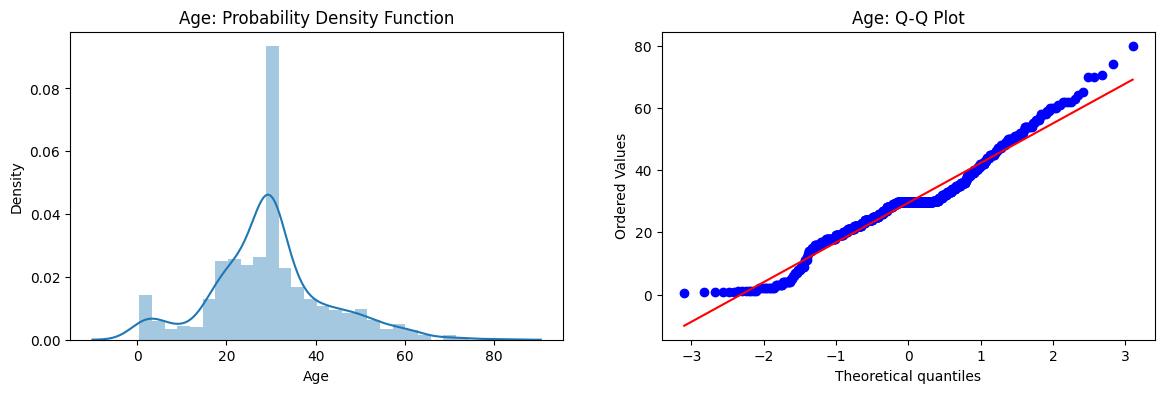

In [56]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age: Probability Density Function')

plt.subplot(122)
stats.probplot(X_train['Age'], dist = 'norm', plot = plt)
plt.title('Age: Q-Q Plot')

plt.show()

<ipython-input-57-eefb377815b0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


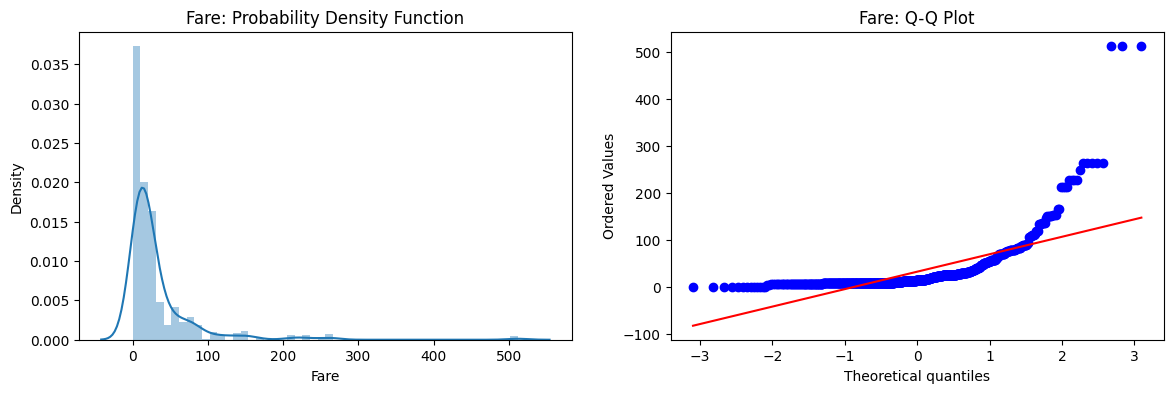

In [57]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare: Probability Density Function')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist = 'norm', plot = plt)
plt.title('Fare: Q-Q Plot')

plt.show()

Plotting Discussion:
-  `Age` is the normally distributed
- `Fare` is Right Skewed or not normally distributed.

We know that in the titanic dataset, the fare has many ups and downs as per classes. So thats why the plot looks like this.

# Applying the Logistic and Decision Tree Classifiers

In [58]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [59]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)

y_pred_lf = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)

print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred_lf) * 100, "%")
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, y_pred_dt)* 100, "%")

Accuracy of Logistic Regression:  64.80446927374301 %
Accuracy of Decision Tree Classifier:  68.71508379888269 %


# Applying Log Transformer on both the columns

In [60]:
transformer1 = FunctionTransformer(func = np.log1p)

- `np.log` => It is normally a `log` which will effect when the number comes to `0`.

- `np.log1p` => `log(number+1)` Now there will be no issue when the number will 0.

In [61]:
X_train_transformed = transformer1.fit_transform(X_train)
X_test_transformed = transformer1.transform(X_test)

In [65]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

lr.fit(X_train_transformed, y_train)
dt.fit(X_train_transformed, y_train)

y_pred_lr = lr.predict(X_test_transformed)
y_pred_dt = dt.predict(X_test_transformed)

print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred_lr) * 100, "%")
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, y_pred_dt) * 100, "%")

Accuracy of Logistic Regression:  68.15642458100558 %
Accuracy of Decision Tree Classifier:  67.59776536312849 %


There is a huge improvement in the Logistic Regression and no improvement in the Decision Tree, yeah some algorithms be like: I will not be effected by your distribution hahaha.

Now yes there is a huge improvement we need to validate this, so we will use cross validation.

# Cross Validation

In [66]:
X_transformed = transformer1.fit_transform(X)
lr = LogisticRegression()
dt = DecisionTreeClassifier()

print("Logistic Regession: ", np.mean(cross_val_score(lr, X_transformed, y, scoring = 'accuracy', cv = 10)))
print("Decision Tree: ", np.mean(cross_val_score(dt, X_transformed, y, scoring = 'accuracy', cv = 10)))

Logistic Regession:  0.678027465667915
Decision Tree:  0.6566292134831461


# Displaying Improvement through the Plottings [`Age` & `Fare`]

## Age: Before and After Logarithmic Transformation

Text(0.5, 1.0, 'Age: After Logarithmic Transformation')

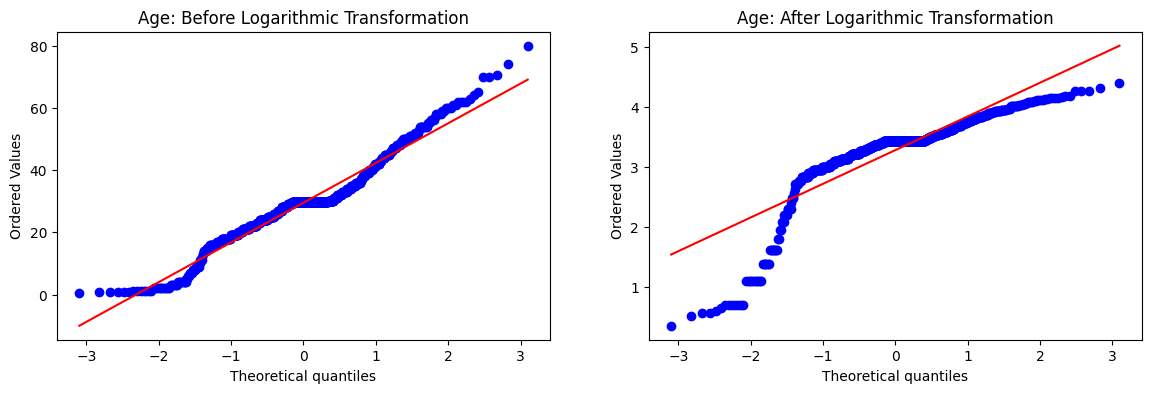

In [67]:
plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist = "norm", plot = plt)
plt.title("Age: Before Logarithmic Transformation")

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist = "norm", plot = plt)
plt.title("Age: After Logarithmic Transformation")

Text(0.5, 1.0, 'Fare: After Logarithmic Transformation')

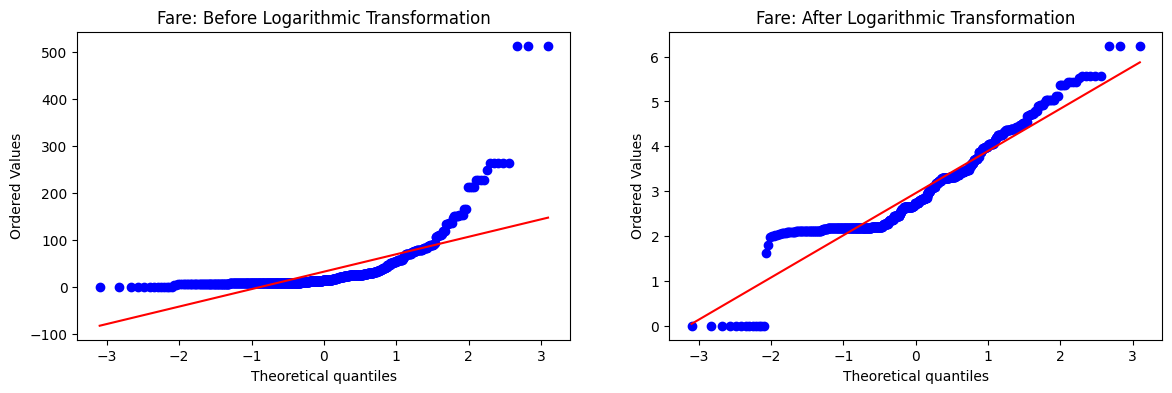

In [68]:
plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist = "norm", plot = plt)
plt.title("Fare: Before Logarithmic Transformation")

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist = "norm", plot = plt)
plt.title("Fare: After Logarithmic Transformation")

Here, we can see from the plotting that the `Fare` plot after the transformation is looking fine and where as the `Age` plot after the transformation is looking like skew some how.

As we know the `Age` was good, we have forcefully applied the transformation to it, whcich was of no need.

So, now we will see what happens when we apply the transformation to the `Fare` only.

# Applying Transformation only in the `Fare` column

In [69]:
transformation2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder = 'passthrough')
X_train_transformed2 = transformation2.fit_transform(X_train)
X_test_transformed2 = transformation2.transform(X_test)

In [71]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

lr.fit(X_train_transformed2, y_train)
dt.fit(X_train_transformed2, y_train)

y_pred_lr = lr.predict(X_test_transformed2)
y_pred_dt = dt.predict(X_test_transformed2)

print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred_lr) * 100, "%")
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, y_pred_dt) * 100, "%")

Accuracy of Logistic Regression:  67.0391061452514 %
Accuracy of Decision Tree Classifier:  67.0391061452514 %


## Cross Validation for the above calculations

In [72]:
X_transformed2 = transformation2.fit_transform(X)
lr = LogisticRegression()
dt = DecisionTreeClassifier()
print("Logistic Regression: ", np.mean(cross_val_score(lr, X_transformed2, y, scoring = 'accuracy', cv = 10)))
print("Decision Tree: ", np.mean(cross_val_score(dt, X_transformed2, y, scoring = 'accuracy', cv = 10)))

Logistic Regression:  0.6712609238451936
Decision Tree:  0.6554931335830212


# Deep Dive into other Transformations [`Square`, `Square-root`, `Reciprocal`]

In [75]:
def apply_transform(transform):
  X = df.iloc[:,1:3]
  y = df.iloc[:,0]

  trf = ColumnTransformer([('log', FunctionTransformer(transform),['Fare'])], remainder = 'passthrough')

  X_transformed = trf.fit_transform(X)

  lr = LogisticRegression()
  dt = DecisionTreeClassifier()

  print("Logistic Regression: ", np.mean(cross_val_score(lr, X_transformed, y, scoring = 'accuracy', cv = 10)))
  print("Decision Tree: ", np.mean(cross_val_score(dt, X_transformed, y, scoring = 'accuracy', cv = 10)))

  plt.figure(figsize = (14,4))

  plt.subplot(121)
  stats.probplot(X['Fare'], dist = "norm", plot = plt)
  plt.title("Fare: Before Transformation")

  plt.subplot(122)
  stats.probplot(X_transformed[:,0], dist = "norm", plot = plt)
  plt.title("Fare: After Transformation")

  plt.show()

Logistic Regression:  0.6589013732833957
Decision Tree:  0.6521223470661672


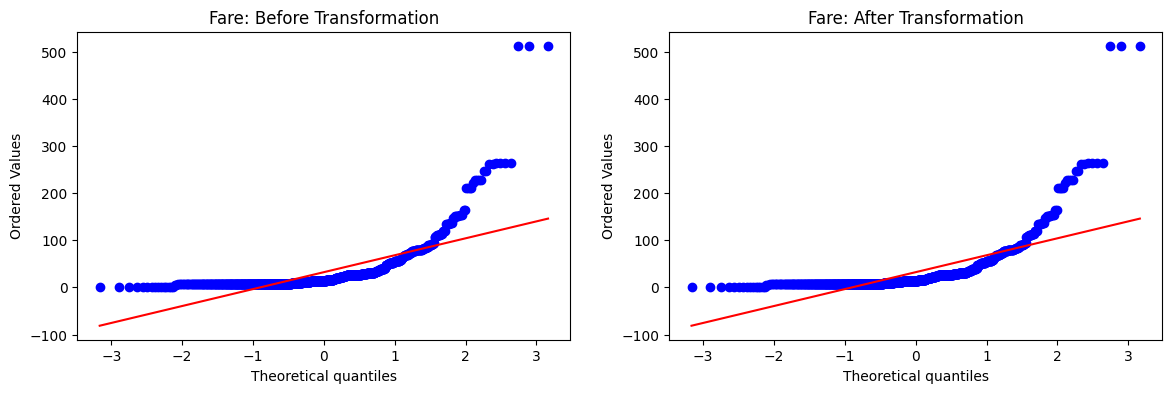

In [76]:
apply_transform(lambda x: x)

Logistic Regression:  0.6431335830212235
Decision Tree:  0.6610986267166041


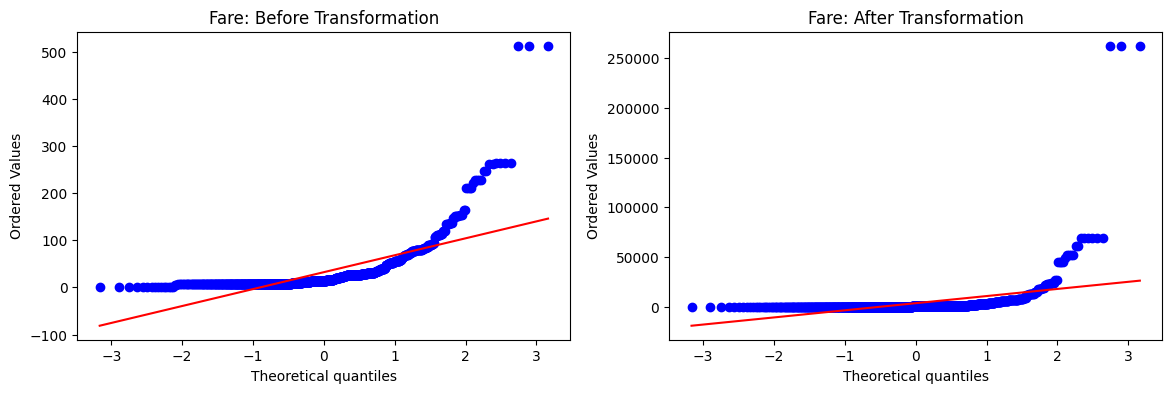

In [77]:
apply_transform(lambda x: x**2)

Logistic Regression:  0.6611485642946316
Decision Tree:  0.6610736579275904


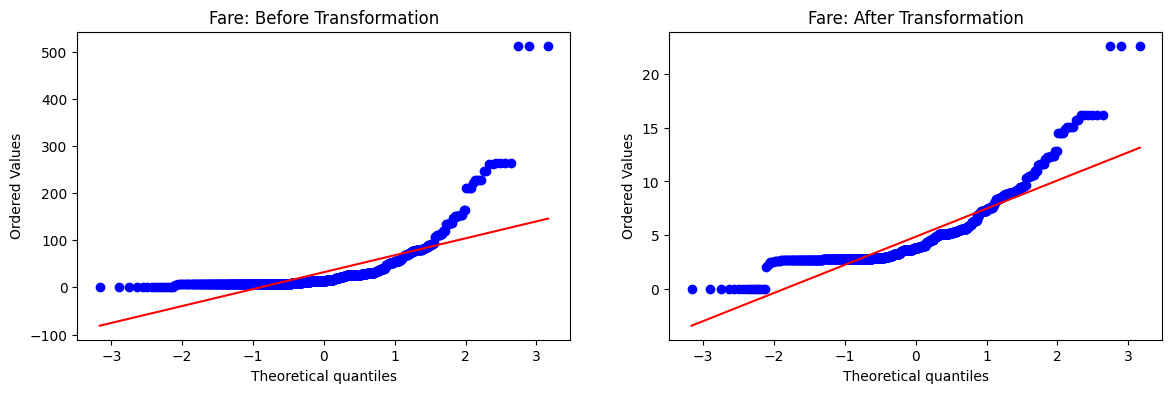

In [78]:
apply_transform(lambda x: x**0.5)

Logistic Regression:  0.6262796504369538
Decision Tree:  0.6565792759051187


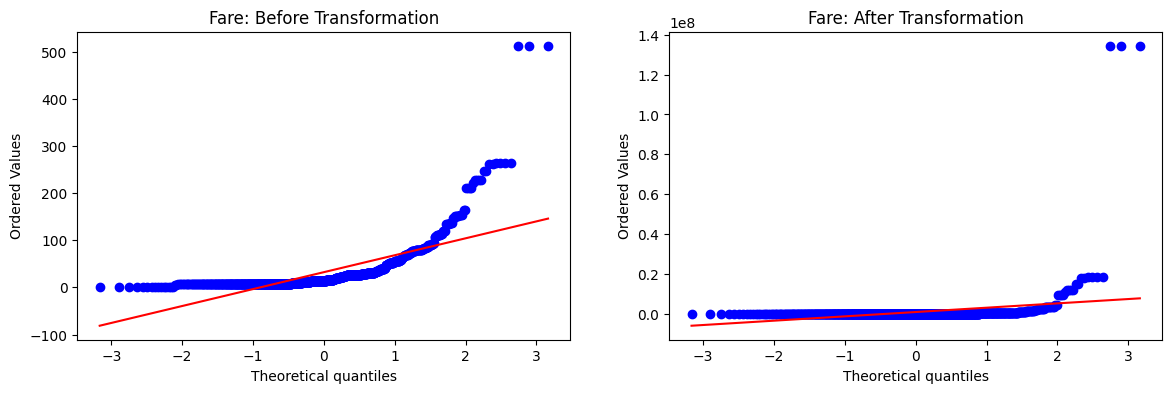

In [79]:
apply_transform(lambda x: x**3)

Logistic Regression:  0.616167290886392
Decision Tree:  0.6678152309612984


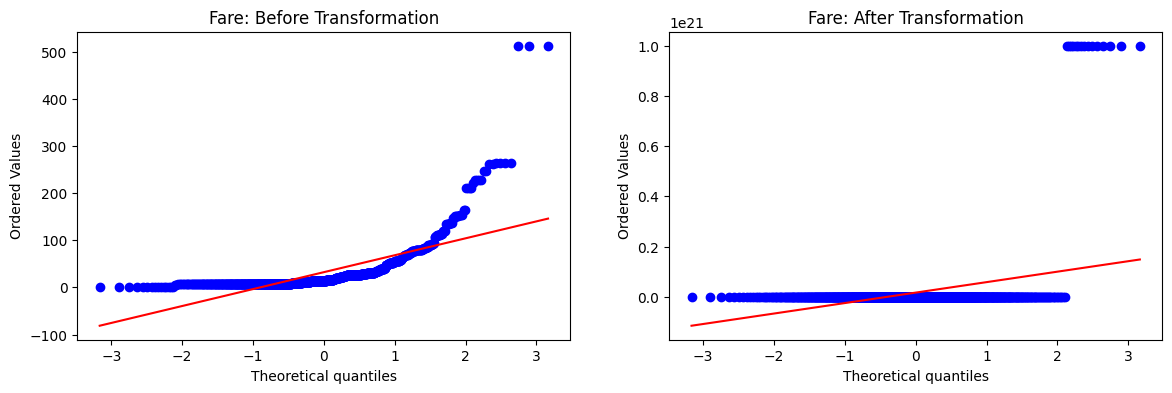

In [82]:
apply_transform(lambda x: 1/(x + 0.000000000000000000001))

Logistic Regression:  0.6195131086142323
Decision Tree:  0.6161797752808988


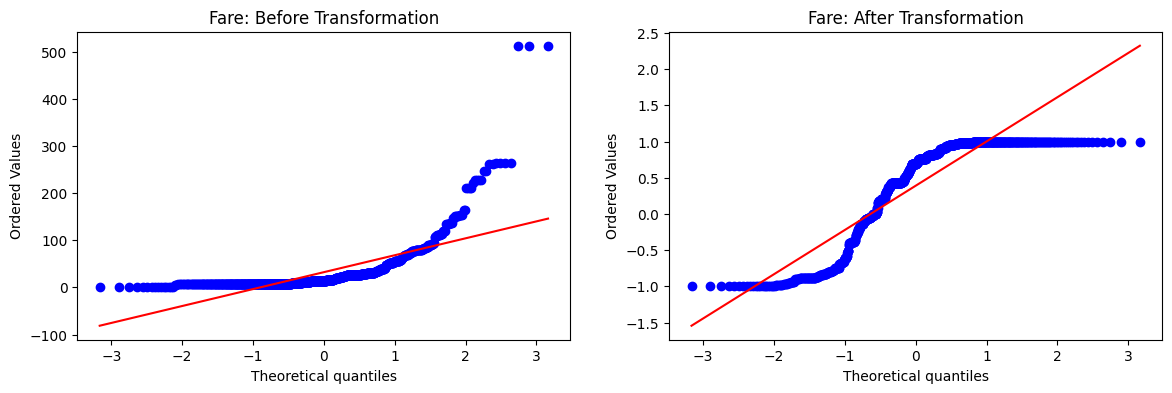

In [83]:
apply_transform(np.sin)